> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: This TMDB Movies data set is a set of movies data collected between 1960 and 2015. The dataset includes fields such as movie titles, directors, vote averages, popularity, imdb id, tagline, keyword, budget, revenues, cast, release dates and years. It contains 10,856 records and 21 columns. This data will require a level of cleaning and wrangling to make the dataset more efficient for analysis and give healthier insights.


### Question(s) for Analysis
>**Questions**: 
- This analysis will try to extract insights on the movies with the largest profit margin from the difference between revenue and budget values.
- Also, the movies with the largest budget will be extracted to see the kind of movies that have been more heavily invested.
- Thirdly, the number of movies produced from 2006 - 2015 will be analyzed to see the trend in the number of movies being produced.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv', index_col=False)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

> **Drop unused columns and duplicated columns** to make the dataset less noisy and intimidating

In [6]:
def dropCol():
    unusedCol = ['homepage', 'imdb_id', 'overview', 'tagline', 'release_date', 'keywords', 
         'vote_average', 'revenue_adj', 'budget_adj']
    for col in unusedCol:
            df.drop(col, axis=1, inplace=True)
dropCol();

In [8]:
# check for duplicated rows in dataset
df.duplicated().sum()

1

In [9]:
# drop duplicated row
df.drop_duplicates(inplace=True)

In [10]:
# test for duplicates again
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
release_year               0
dtype: int64

In [12]:
# check data types for all Useful columns
df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
release_year              int64
dtype: object

Check the shape of the dataset after trimming off unused columns

In [7]:
df.shape

(10866, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
release_year            10865 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 1.1+ MB


###### convert zeros in the budget and revenue columns to NAN and drop the NAN values afterwards

In [14]:
# check for missing values in the budget column
df['budget'].isna().sum()

0

In [15]:
# replace zeros in budget column and row column
df[['budget', 'revenue']] = df[['budget', 'revenue']].replace(0,np.NAN)
df.dropna(subset=['budget', 'revenue'],inplace=True)

In [16]:
df['budget'].isna().sum()

0

In [17]:
df['revenue'].isna().sum()

0

> After converting 0 values in budget and revenue to np.NAN values. Dropping the NA values trimmed the dataset down to 3854 records

###### create the profit gap column

In [18]:
df['profit_gap'] = df['revenue']-df['budget']

In [19]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,release_year,profit_gap
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,2015,1.316249e+09


In [20]:
df.dtypes

id                        int64
popularity              float64
budget                  float64
revenue                 float64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
release_year              int64
profit_gap              float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### What are the top 10 most profitable movies?

In [21]:
top_profits = df.sort_values(by='profit_gap', ascending=False)[:10]
top_profits = top_profits.iloc[:, [4,-1]]

In [22]:
top_profits

,original_title,profit_gap
1386,Avatar,2.544506e+09
3,Star Wars: The Force Awakens,1.868178e+09
5231,Titanic,1.645034e+09
0,Jurassic World,1.363529e+09
4,Furious 7,1.316249e+09
4361,The Avengers,1.299558e+09
3374,Harry Potter and the Deathly Hallows: Part 2,1.202818e+09
14,Avengers: Age of Ultron,1.125036e+09
5422,Frozen,1.124219e+09
8094,The Net,1.084280e+09


In [23]:
top_profits.reset_index(drop=True, inplace=True)

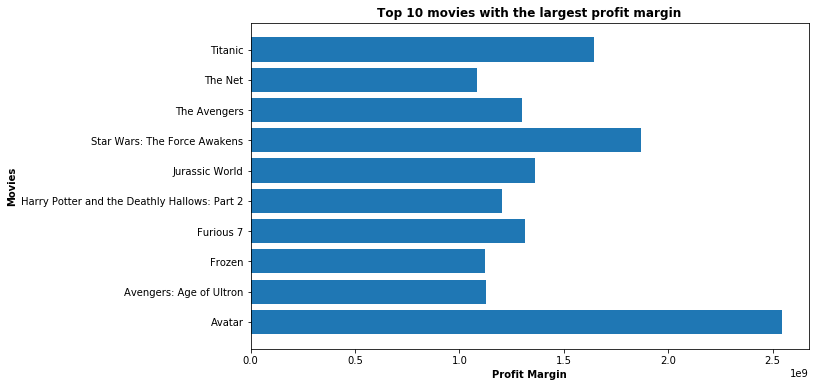

In [26]:
top_profits
plt.figure(figsize=(10,6))
plt.barh('original_title', 'profit_gap', data=top_profits, label='movies')
plt.title('Top 10 movies with the largest profit margin', fontweight="bold")
plt.xlabel('Profit Margin', fontweight="bold")
plt.ylabel('Movies', fontweight="bold");

##### Interpretation of Plot

From the plot above, the top 10 most profitable movies produced are shown. **Avatar** is shown to be the most profitable movie between year 1960 and 2015 with a profit margin of 2.54 billion. The profit margin is plotted on the x-axis while the movie names are plotted on the y-aixs.The 10th most profitable movie is **The Net**; with a profit margin of 1.08 billion.

### Top 10 movies with the highest ever budgets

In [27]:
top_budgets = df.sort_values(by='budget', ascending=False)[:10]
top_budgets.iloc[:, [4,2]]

,original_title,budget
2244,The Warrior's Way,425000000.0
3375,Pirates of the Caribbean: On Stranger Tides,380000000.0
7387,Pirates of the Caribbean: At World's End,300000000.0
14,Avengers: Age of Ultron,280000000.0
6570,Superman Returns,270000000.0
1929,Tangled,260000000.0
4411,John Carter,260000000.0
7394,Spider-Man 3,258000000.0
5508,The Lone Ranger,255000000.0
1389,Harry Potter and the Half-Blood Prince,250000000.0


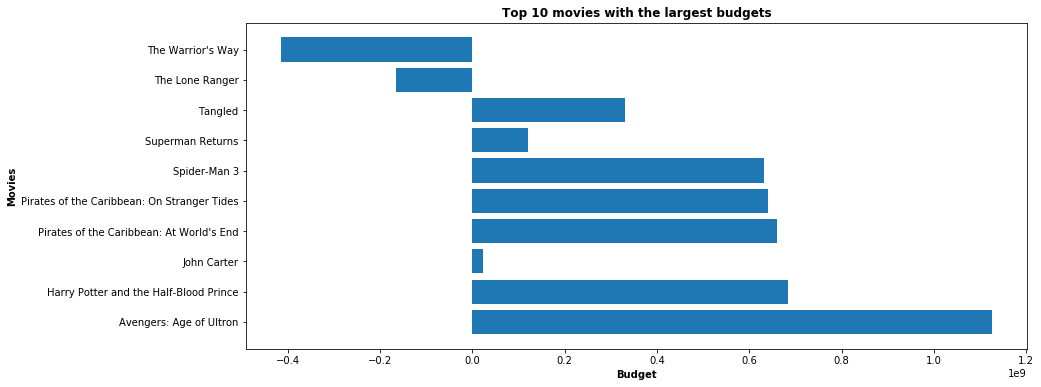

In [28]:
top_budgets
plt.figure(figsize=(14,6))
plt.barh('original_title', 'profit_gap', data=top_budgets)
plt.xlabel('Budget', fontweight="bold")
plt.ylabel('Movies', fontweight="bold")
plt.title('Top 10 movies with the largest budgets', fontweight="bold");

#### Interpretation of Plot

The above plot shows the top 10 movies produced between 1960 and 2015 with the largest budgets. The x-axis carries the budget while the y-axis carries the movie names. From the plot, The Warrior's Way is the movie with the largest budget ever while "John Carter" is the movie with the 10th largest budget.

### Number of Published Movies in the Last 10 years of records

In [29]:
# count the number of movies per year
year_count=df.groupby(['release_year']).count()

# sort the dataframe in ascending order and extract the last 10 records 
T10=year_count.sort_values(by='release_year', ascending=True).tail(10)

In [30]:
col=T10[T10.columns[:1]]

In [31]:
# add index column to the dataframe
col = col.reset_index()

In [35]:
col.loc[:,'release_year'].head()

0    2006
1    2007
2    2008
3    2009
4    2010
Name: release_year, dtype: int64

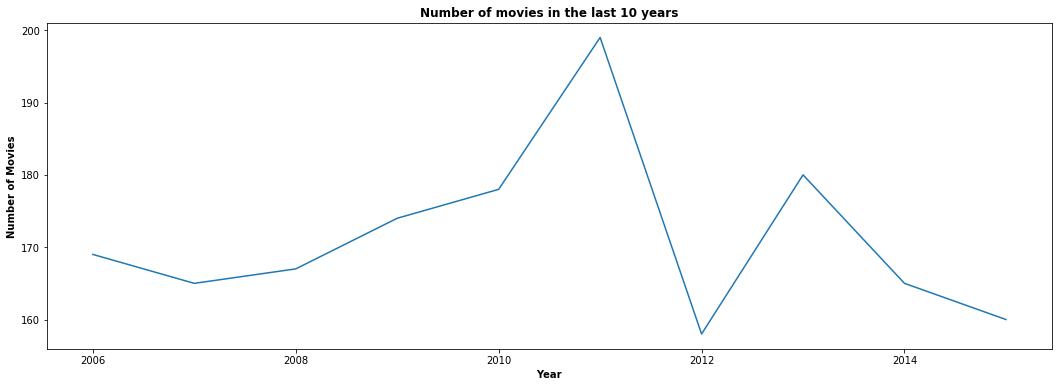

In [33]:
# plot a line chart for the number of movies produced in the last 10 years

plt.figure(figsize=(18, 6))
plt.plot(col.loc[:,'release_year'], col.loc[:,'id'], label='no. of movies')
plt.title('Number of movies in the last 10 years', fontweight="bold")
plt.xlabel('Year', fontweight="bold")
plt.ylabel('Number of Movies', fontweight="bold");

#### Interpretation of Plot

From the plot above, the trend of the number of movies produced between 2006 and 2015 is plotted. The x-axis carries the Year while the y-axis carries the number of movies produced. From the plot, there has incessantly been a downward trend in the number of movies produced from 2013 to 2015. The year with the highest number of produced movie is in 2011 

<a id='conclusions'></a>
## Conclusions
> From analysis, insights can be derived that **Avatar is the most profitable movie produced between 1960 and 2015 with about 2.5 x 10e9 USD in profits**

> The **Warrior's Way** is the movie that has been most heavily invested in within the period of 1960 and 2015 with 425 million USD in budget. Ironically, the movie is not among the top 10 most profitable movies within same period. In fact, only 3 movies within the 10 most heavily budgeted movies pulled profits within the top 10 most profitable movies within same period. 
Big budget **may not** guarantee giant profits as far as movie production is concerned.

> There has been a **steady downtrend of the number of movies produced from the year 2011.** What could be the cause of this neww trend?

> A **limitation of this analysis** is the out of date records. This makes it less relevant to current movie trends. The latest year of records in the dataset is 2015 and considerable change in movie trends and viewers' behaviours especially with much more popular movie streaming platforms. Updated dataset could provide distinctive insights to trends in the tmbd movies records.



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])